## Download Mental Health dataset

In [57]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/suchintikasarkar/sentiment-analysis-for-mental-health')

Skipping, found downloaded files in "./sentiment-analysis-for-mental-health" (use force=True to force download)


## Load dataset

In [5]:
import pandas as pd

In [6]:
df_sentiment = pd.read_csv('/content/sentiment-analysis-for-mental-health/Combined Data.csv')

## Data study

In [7]:
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# to see first 5 records
df_sentiment.head()

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety


In [9]:
# to see last 5 records
df_sentiment.tail()

,Unnamed: 0,statement,status
53038,53038,Nobody takes me seriously I’ve (24M) dealt wit...,Anxiety
53039,53039,"selfishness ""I don't feel very good, it's lik...",Anxiety
53040,53040,Is there any way to sleep better? I can't slee...,Anxiety
53041,53041,"Public speaking tips? Hi, all. I have to give ...",Anxiety
53042,53042,I have really bad door anxiety! It's not about...,Anxiety


In [10]:
# To see dtype and non-null count
df_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53043 entries, 0 to 53042
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  53043 non-null  int64 
 1   statement   52681 non-null  object
 2   status      53043 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [11]:
# to see all null values
df_sentiment.isnull().sum()

,0
Unnamed: 0,0
statement,362
status,0


In [12]:
df_sentiment.dropna(inplace=True)

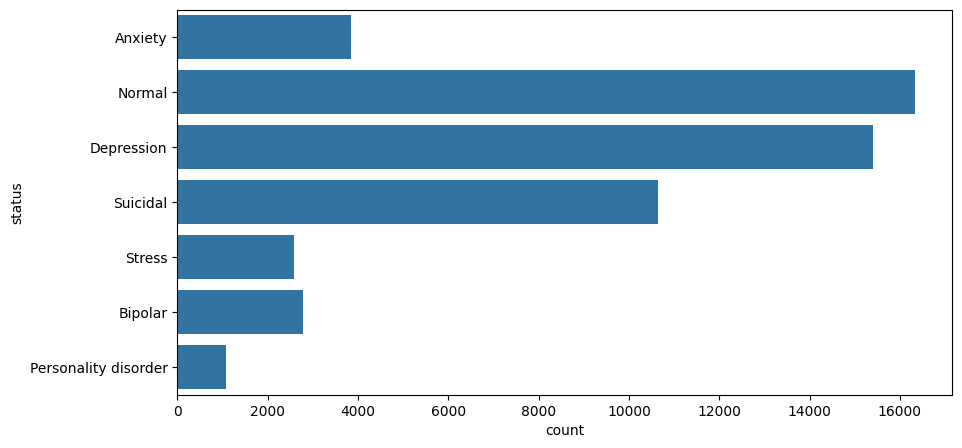

In [13]:
# how many different class values?
plt.figure(figsize=(10, 5))
sns.countplot(df_sentiment.status)
plt.show()

In [14]:
# visualizing random samples and their len
random_idx = random.randint(0,len(df_sentiment)-10)
for _, txt, label in df_sentiment[['statement','status']][random_idx:random_idx+10].itertuples():
  print(f"Text:{txt[:len(txt)//2]}\n{txt[len(txt)//2:]}\n\nLabel: {label}\n")

Text:Your morals a
re like ashes.

Label: Normal

Text:having trouble sorting radiohead's best al
bum after kid a - ok computer - in rainbows

Label: Normal

Text:650 followers I'm goin
g to take a shower T_T

Label: Normal

Text:1 SEMESTER Fluent in MANDARIN? Here is the ANSWER!! FIRST in BANDUNG F
REE registration during the PROMO period Hub: 022-61112233 BisaMandarin

Label: Normal

Text:Bismillah, it doesn't flop, I'm looking 
for a mutual fandom all. help rt/like yaa

Label: Normal

Text:ping ! RT yes, we are mut
ual. Don't forget folbek.

Label: Normal

Text:Hi Cindy Gulla Whe
n will we meet? >,<

Label: Normal

Text:There are no difficult subjects, exce
pt laziness will learn these subjects

Label: Normal

Text:There's a lot of work today .. Btw, for those who have DM i for that work, we will contact you slowly o
ne by one, because I also have a lot of crazy applications from other colleagues. Take a little time ye

Label: Normal

Text:VIU PREMIUM ..â˜ž1 year - 25k (own email + 

In [15]:
# to check how many tokens per statement and statements leng
sentLeng = [len(str(i).split()) for i in df_sentiment['statement'].to_numpy()]
avgToken = sum([len(str(i).split()) for i in df_sentiment['statement'].to_numpy()])/len(df_sentiment)

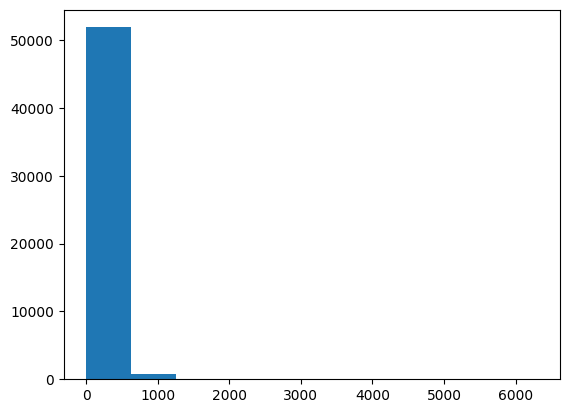

In [16]:
plt.hist(sentLeng);

In [17]:
avgToken

113.15872895351265

In [18]:
np.percentile(sentLeng, 90)

279.0


## Data preprocessing

In [19]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import re
import string
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


For this project i will only use 3 classes:
 * Suicidal
 * Depression
 * Normal

In [22]:
df_sentiment = df_sentiment.loc[(df_sentiment['status']=='Suicidal')|(df_sentiment['status']=='Depression')|(df_sentiment['status']=='Normal')]

In [20]:
lemmatizer = WordNetLemmatizer()
def clean_and_lemmatize(text):
  text = re.sub('^a-zA-Z', ' ', text)
  text = re.sub('[\d-]',' ', text)
  text = text.lower()
  text = text.split()
  [w for w in text if w not in stopwords.words('english')]
  [lemmatizer.lemmatize(w) for w in text if w not in string.punctuation]
  text = ' '.join(text)
  if len(text)>0:
    return text
  else:
    pass

In [23]:
df_sentiment['text_clean'] = df_sentiment['statement'].apply(clean_and_lemmatize)

In [24]:
df_sentiment.head()

,Unnamed: 0,statement,status,text_clean
733,733,"Gr gr dreaming of ex crush to be my game, God",Normal,"gr gr dreaming of ex crush to be my game, god"
734,734,wkwkwk what a joke,Normal,wkwkwk what a joke
735,735,Leaves are also standby in front of the PC ......,Normal,leaves are also standby in front of the pc ......
736,736,Thank God even though it's just a ride through,Normal,thank god even though it's just a ride through
737,737,wedding teaser concept using the song day6 - o...,Normal,wedding teaser concept using the song day only...


In [25]:
df_sentiment.isnull().sum()

,0
Unnamed: 0,0
statement,0
status,0
text_clean,1


In [26]:
df_sentiment.dropna(inplace=True)

In [27]:
df_sentiment.isnull().sum()

,0
Unnamed: 0,0
statement,0
status,0
text_clean,0


## Running some experiments

In [28]:
# to split data into independent and dependent features
X = df_sentiment['text_clean'].to_numpy()
y = df_sentiment['status'].to_numpy()

In [29]:
# to split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    stratify=y,
                                                    shuffle=True)

### ML models

##### NaiveBayes model

In [30]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [31]:
clf_nb = Pipeline([('tfidf', TfidfVectorizer()),
                   ('clf', MultinomialNB())])

In [32]:
clf_nb.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

#### Evaluating the NaiveBayes model

In [33]:
from sklearn import metrics

Accuracy:60.18%


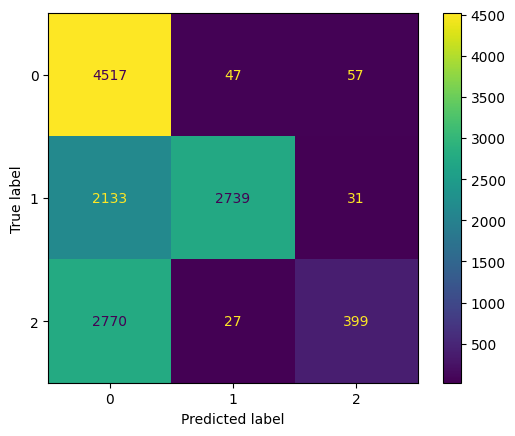

              precision    recall  f1-score   support

  Depression       0.48      0.98      0.64      4621
      Normal       0.97      0.56      0.71      4903
    Suicidal       0.82      0.12      0.22      3196

    accuracy                           0.60     12720
   macro avg       0.76      0.55      0.52     12720
weighted avg       0.76      0.60      0.56     12720



In [34]:
nb_preds = clf_nb.predict(X_test)
print(f'Accuracy:{metrics.accuracy_score(y_test, nb_preds)*100:.2f}%')
cm = metrics.confusion_matrix(y_test, nb_preds)
disp = metrics.ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()
print(metrics.classification_report(y_test, nb_preds))

#### RandomForest model

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
clf_rf = Pipeline([('tfidf', TfidfVectorizer()),
                   ('clf', RandomForestClassifier())])

In [37]:
clf_rf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier())])

#### Evaluating the RandomForest model

Accuracy:74.91%


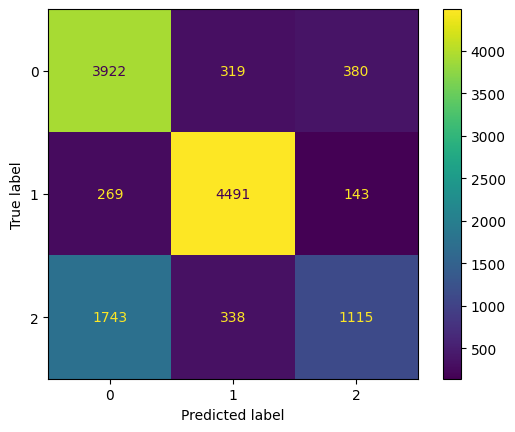

              precision    recall  f1-score   support

  Depression       0.66      0.85      0.74      4621
      Normal       0.87      0.92      0.89      4903
    Suicidal       0.68      0.35      0.46      3196

    accuracy                           0.75     12720
   macro avg       0.74      0.70      0.70     12720
weighted avg       0.75      0.75      0.73     12720



In [38]:
rf_preds = clf_rf.predict(X_test)
print(f'Accuracy:{metrics.accuracy_score(y_test, rf_preds)*100:.2f}%')
cm = metrics.confusion_matrix(y_test, rf_preds)
disp = metrics.ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()
print(metrics.classification_report(y_test, rf_preds))

#### Svm model

In [39]:
from sklearn.svm import SVC

In [40]:
clf_svm = Pipeline([('tfidf', TfidfVectorizer()),
                   ('clf', SVC())])

In [41]:
clf_svm.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', SVC())])

#### Evaluating the SVM model

Accuracy:82.75%


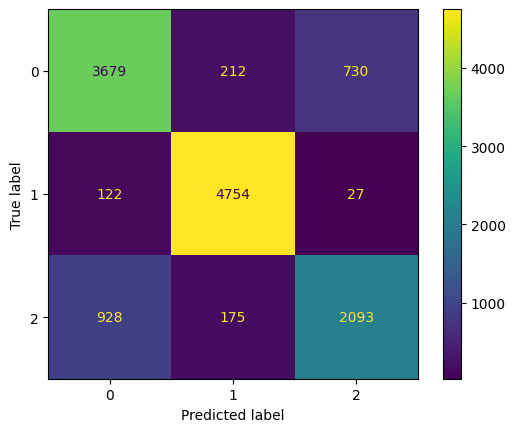

              precision    recall  f1-score   support

  Depression       0.78      0.80      0.79      4621
      Normal       0.92      0.97      0.95      4903
    Suicidal       0.73      0.65      0.69      3196

    accuracy                           0.83     12720
   macro avg       0.81      0.81      0.81     12720
weighted avg       0.82      0.83      0.82     12720



In [42]:
svm_preds = clf_svm.predict(X_test)
print(f'Accuracy:{metrics.accuracy_score(y_test, svm_preds)*100:.2f}%')
cm = metrics.confusion_matrix(y_test, svm_preds)
disp = metrics.ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()
print(metrics.classification_report(y_test, svm_preds))

#### KNeighborsClassifier model

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
clf_knc = Pipeline([('tfidf', TfidfVectorizer()),
                   ('clf', KNeighborsClassifier(n_neighbors=3))])

In [55]:
clf_knc.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', KNeighborsClassifier())])

Accuracy:67.40%


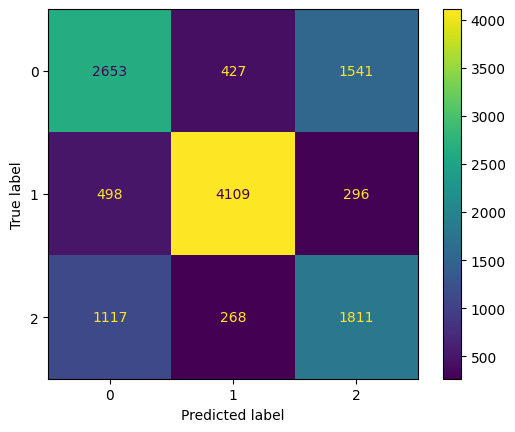

              precision    recall  f1-score   support

  Depression       0.62      0.57      0.60      4621
      Normal       0.86      0.84      0.85      4903
    Suicidal       0.50      0.57      0.53      3196

    accuracy                           0.67     12720
   macro avg       0.66      0.66      0.66     12720
weighted avg       0.68      0.67      0.68     12720



In [56]:
knc_preds = clf_knc.predict(X_test)
print(f'Accuracy:{metrics.accuracy_score(y_test, knc_preds)*100:.2f}%')
cm = metrics.confusion_matrix(y_test, knc_preds)
disp = metrics.ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()
print(metrics.classification_report(y_test, knc_preds))